In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metadata = pd.read_csv('SingaporeCRC_data/SG-BULK_patient_clinical_information.csv', index_col=0,delimiter=",")
metadata = metadata.dropna()
metadata = pd.DataFrame(metadata)
metadata

,TMB,KRAS,BRAF,NRAS,TP53,APC,PIK3CA,PIK3R1,SMAD4,ERBB4,...,Age.at.Diagnosis,Site.of.Primary.Colorectal.tumour,Side,Grade,TNM,Stage,iCMS,CMS,group3,group5
patient_id,,,,,,,,,,,,,,,,,,,,,
106,1028,wt,wt,wt,wt,wt,wt,wt,wt,wt,...,72.0,Transverse colon,Right,3,T4aN2(4/29)M0,IIIC,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
153,80,mut,wt,wt,mut,mut,mut,wt,wt,wt,...,66.0,Sigmoid colon,Left,2,T3N1(1/18)M0,IIIB,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
269,10,wt,wt,wt,wt,wt,wt,wt,wt,wt,...,54.0,Rectum,Left,2,T1N1c(0/11)M0,IIIB,iCMS3,CMS4,iCMS3_MSS,iCMS3_fibrotic
326,1512,mut,wt,wt,wt,wt,wt,wt,wt,mut,...,55.0,Rectosigmoid junction,Left,2,Unknown,II,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
420,1976,mut,wt,wt,mut,mut,wt,wt,wt,wt,...,58.0,Sigmoid colon,Left,2,T3N1(1/23)M0,IIIB,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658,82,mut,wt,wt,mut,mut,wt,wt,wt,wt,...,59.0,Rectum,Left,2,T3N2b(8/22)M1,IV,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS
1662,74,mut,wt,wt,mut,wt,wt,wt,wt,wt,...,67.0,Rectum,Left,2,T3N1a(1/36)M0,IIIB,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS
1664,46,mut,wt,wt,mut,wt,wt,wt,wt,wt,...,62.0,Sigmoid colon,Left,2,T3N2a(6/29)M0,IIIC,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic


In [6]:
metadata.columns

Index(['TMB', 'KRAS', 'BRAF', 'NRAS', 'TP53', 'APC', 'PIK3CA', 'PIK3R1',
       'SMAD4', 'ERBB4', 'RNF43', 'ZNRF3', 'KIT', 'TGFBR2', 'Vital.status',
       'MSI.Status', 'CRIS', 'Gender', 'Age.at.Diagnosis',
       'Site.of.Primary.Colorectal.tumour', 'Side', 'Grade', 'TNM', 'Stage',
       'iCMS', 'CMS', 'group3', 'group5'],
      dtype='object')

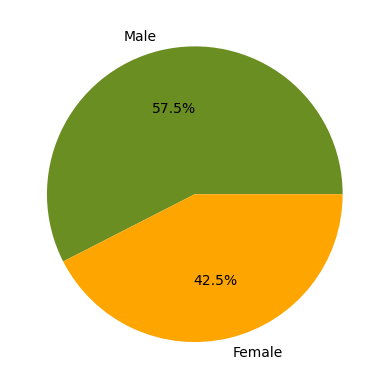

In [29]:
gender_counts = metadata['Gender'].value_counts()

labels = gender_counts.index
sizes = gender_counts.values
colors = ['olivedrab','orange']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

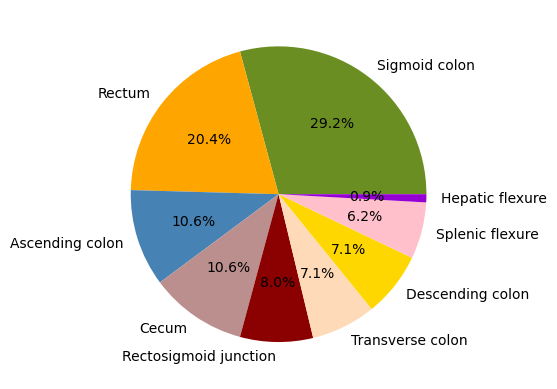

In [64]:
TumorSite_counts = metadata['Site.of.Primary.Colorectal.tumour'].value_counts()

labels = TumorSite_counts.index
sizes = TumorSite_counts.values
colors = ['olivedrab','orange','steelblue', 'rosybrown', 'darkred', 'peachpuff', 'gold', 'pink', 'darkviolet']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

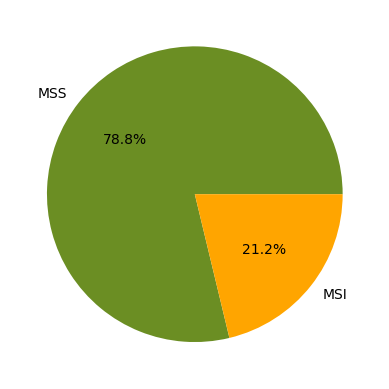

In [62]:
msi_counts = metadata['MSI.Status'].value_counts()

labels = msi_counts.index
sizes = msi_counts.values
colors = ['olivedrab','orange']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

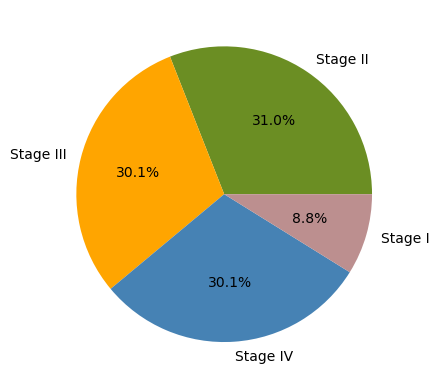

In [44]:
stage_mapping = {
    'I': 'stage I',
    'II': 'stage II',
    'III': 'stage III',
    'IV': 'stage IV',
    'IIA': 'stage II',
    'IIA': 'stage II',
    'IIIB': 'stage III',
    'IIIC': 'stage III',
    'IIC': 'stage II',
    'IIB': 'stage II',
    'IIIA': 'stage III',
    'IVB': 'stage IV',
    'IVA': 'stage IV'
}

metadata_stage = metadata
metadata_stage['Stage'] = metadata_stage['Stage'].replace(stage_mapping)

stage_counts = metadata_stage['Stage'].value_counts()

labels = stage_counts.index
sizes = stage_counts.values
colors = ['olivedrab','orange','steelblue', 'rosybrown']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

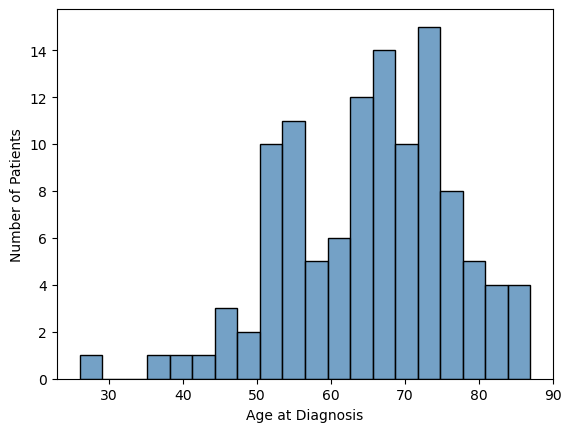

In [45]:
sns.histplot(metadata['Age.at.Diagnosis'], bins=20, color='steelblue')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Number of Patients')
plt.show()

In [49]:
from scipy.stats import chi2_contingency

conti_table = pd.crosstab(metadata_stage['MSI.Status'], metadata_stage['Stage'])
chi2, p, dof, expected = chi2_contingency(conti_table)
ratio = conti_table / expected

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print("Observed to Expected Ratios:")
print(ratio)

Chi-Square Statistic: 15.031190790923112
P-value: 0.001790187347325516
Degrees of Freedom: 3
Expected Frequencies:
[[ 2.12389381  7.43362832  7.22123894  7.22123894]
 [ 7.87610619 27.56637168 26.77876106 26.77876106]]
Observed to Expected Ratios:
Stage        Stage I  Stage II  Stage III  Stage IV
MSI.Status                                         
MSI         0.470833  1.883333   1.107843   0.13848
MSS         1.142697  0.761798   0.970919   1.23232


In [58]:
from scipy.stats import chi2_contingency

conti_table = pd.crosstab( metadata_stage['Site.of.Primary.Colorectal.tumour'], metadata_stage['MSI.Status'])
chi2, p, dof, expected = chi2_contingency(conti_table)
ratio = conti_table / expected

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print("Observed to Expected Ratios:")
print(ratio)

Chi-Square Statistic: 38.891871089668165
P-value: 5.147704897054757e-06
Degrees of Freedom: 8
Expected Frequencies:
[[ 2.54867257  9.45132743]
 [ 2.54867257  9.45132743]
 [ 1.69911504  6.30088496]
 [ 0.21238938  0.78761062]
 [ 1.91150442  7.08849558]
 [ 4.88495575 18.11504425]
 [ 7.00884956 25.99115044]
 [ 1.48672566  5.51327434]
 [ 1.69911504  6.30088496]]
Observed to Expected Ratios:
MSI.Status                              MSI       MSS
Site.of.Primary.Colorectal.tumour                    
Ascending colon                    2.746528  0.529026
Cecum                              0.784722  1.058052
Descending colon                   0.588542  1.110955
Hepatic flexure                    4.708333  0.000000
Rectosigmoid junction              0.523148  1.128589
Rectum                             0.204710  1.214460
Sigmoid colon                      0.285354  1.192714
Splenic flexure                    2.017857  0.725522
Transverse colon                   3.531250  0.317416


In [54]:
from scipy.stats import chi2_contingency

conti_table = pd.crosstab(metadata_stage['Site.of.Primary.Colorectal.tumour'], metadata_stage['Stage'])
chi2, p, dof, expected = chi2_contingency(conti_table)
ratio = conti_table / expected

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)
print("Observed to Expected Ratios:")
print(ratio)

Chi-Square Statistic: 31.309068390201936
P-value: 0.14506964780158582
Degrees of Freedom: 24
Expected Frequencies:
[[ 1.0619469   3.71681416  3.61061947  3.61061947]
 [ 1.0619469   3.71681416  3.61061947  3.61061947]
 [ 0.7079646   2.47787611  2.40707965  2.40707965]
 [ 0.08849558  0.30973451  0.30088496  0.30088496]
 [ 0.79646018  2.78761062  2.7079646   2.7079646 ]
 [ 2.03539823  7.12389381  6.92035398  6.92035398]
 [ 2.92035398 10.22123894  9.92920354  9.92920354]
 [ 0.61946903  2.16814159  2.10619469  2.10619469]
 [ 0.7079646   2.47787611  2.40707965  2.40707965]]
Observed to Expected Ratios:
Stage                               Stage I  Stage II  Stage III  Stage IV
Site.of.Primary.Colorectal.tumour                                         
Ascending colon                    0.941667  0.807143   1.384804  0.830882
Cecum                              0.941667  1.076190   0.553922  1.384804
Descending colon                   1.412500  0.807143   1.246324  0.830882
Hepatic flexure      